<a href="https://colab.research.google.com/github/MohebZandi/Comupter_Vision/blob/main/Data_Numpy_vs_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: A deep understanding of deep learning
## SECTION: Data matrices and loaders
### LECTURE: Anatomy of a torch dataset and dataloader
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202108

In [1]:
  # import libraries
import numpy as np
import torch
from torch.utils.data import DataLoader,TensorDataset

In [2]:
# create some data in numpy

nObservations = 100
nFeatures = 20

data = np.random.randn(nObservations,nFeatures)

In [3]:
# Convert to pytorch tensor
dataT = torch.tensor( data ) 

# print out some information
print('Numpy data:')
print(type(data))
print(data.shape) # numpy -> .shape
print(data.dtype)
print(' ')

print('Tensor data:')
print(type(dataT))
print(dataT.size()) # torch -> .size()
print(dataT.dtype)
print(' ')

Numpy data:
<class 'numpy.ndarray'>
(100, 20)
float64
 
Tensor data:
<class 'torch.Tensor'>
torch.Size([100, 20])
torch.float64
 


In [4]:
# Sometimes you need to convert data types

dataT2 = torch.tensor( data ).float()    # float data type in tensor
print(dataT2.dtype)

# "long" is for ints
dataT3 = torch.tensor( data ).long()    # int64 data type in tensor
print(dataT3.dtype)


torch.float32
torch.int64


In [7]:
# Convert tensor into PyTorch Datasets

# dataset = TensorDataset(data)     # not a tensor!
dataset = TensorDataset(dataT)

# dataset is a two-element tuple comprising data,labels
dataset.tensors[0]

tensor([[-0.1410,  0.6943,  0.5690,  ...,  0.7256, -0.1225, -0.2654],
        [ 1.7044,  0.2279,  0.2249,  ..., -2.1575,  0.6620,  0.2855],
        [-0.5568,  0.6708,  1.2340,  ...,  1.7823,  0.3084,  1.0239],
        ...,
        [ 1.5667,  0.5222, -0.1578,  ..., -0.1839, -0.6661,  0.5595],
        [-0.9942,  1.9583,  0.1899,  ...,  0.0719,  1.1933,  1.5907],
        [-0.9264, -0.2730,  0.7271,  ..., -0.2822,  2.3999,  0.2298]],
       dtype=torch.float64)

In [11]:
# Let's try again with labels
labels = torch.ceil(torch.linspace(.01,4,nObservations))

# transform to an actual matrix (column vector)



tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])


In [ ]:
# see the labels for every row
labels = labels.reshape(( len(labels),1 ))
print( labels )

In [13]:

# now make another dataset
dataset = TensorDataset(dataT,labels)
print( dataset.tensors[0].size() )
print( dataset.tensors[1].size() )

# for comparison
print( np.shape(np.random.randint(5,size=nObservations)) )

torch.Size([100, 20])
torch.Size([100, 1])
(100,)


In [14]:
dataset[0]    # it contains the data and label in one row

(tensor([-0.1410,  0.6943,  0.5690,  0.7939,  0.5175,  1.4316,  0.9518, -1.1957,
         -0.2280,  0.4413, -0.3202, -1.4459, -0.1835,  0.0931,  0.7619, -0.8573,
          1.3076,  0.7256, -0.1225, -0.2654], dtype=torch.float64),
 tensor([1.]))

Data Loaders

In [15]:
# create a dataloader object
batchsize = 25
dataloader = DataLoader(dataset, batch_size= batchsize) #,shuffle= True, drop_last= True)

dataloader.dataset.tensors[0].size()

torch.Size([100, 20])

Using the batches in training the model

In [16]:
# sizes of each batch
for dat,labs in dataloader:
  print('BATCH INFO:')
  print(dat.size())
  print(labs.size())
  print(' ')

BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 


In [17]:
# inspect the labels
for dat,labs in dataloader:
  print(labs.T)
  print(' ')

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.]])
 
tensor([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2.]])
 
tensor([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
         3., 3., 3., 3., 3., 3., 3.]])
 
tensor([[4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 4., 4., 4., 4., 4.]])
 


In [21]:
# try again with shuffling (shuffling happens during iterations)
# dataloader = DataLoader(dataset,batch_size=batchsize,shuffle=True)

for dat,labs in dataloader:     # Even when we comment the above code, the shuffling will be done
  print(labs.T)
  print(' ')

tensor([[2., 1., 2., 4., 1., 1., 4., 4., 3., 3., 3., 1., 4., 4., 2., 4., 1., 4.,
         2., 4., 3., 1., 1., 3., 1.]])
 
tensor([[2., 1., 4., 1., 4., 4., 2., 4., 2., 1., 4., 3., 2., 2., 4., 4., 3., 1.,
         1., 3., 3., 2., 1., 1., 2.]])
 
tensor([[4., 3., 3., 3., 2., 4., 2., 2., 3., 2., 4., 2., 1., 1., 4., 4., 1., 2.,
         1., 2., 1., 4., 3., 4., 4.]])
 
tensor([[2., 3., 1., 1., 1., 4., 3., 3., 2., 2., 3., 1., 2., 3., 2., 3., 3., 3.,
         2., 1., 3., 4., 3., 2., 3.]])
 


In [22]:
# To get only one batch (e.g., for testing)

dat,labs = next(iter(dataloader))

labs

tensor([[3.],
        [1.],
        [3.],
        [4.],
        [2.],
        [4.],
        [3.],
        [2.],
        [2.],
        [2.],
        [4.],
        [1.],
        [3.],
        [1.],
        [3.],
        [4.],
        [3.],
        [4.],
        [1.],
        [3.],
        [4.],
        [3.],
        [1.],
        [4.],
        [2.]])

## Sample Size and Network Depth

In [23]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [24]:
# a function that creates data

def createSomeData(nPerClust):

  A = [ 1, 1 ]
  B = [ 5, 1 ]
  C = [ 4, 4 ]

  # generate data
  a = [ A[0]+np.random.randn(nPerClust) , A[1]+np.random.randn(nPerClust) ]
  b = [ B[0]+np.random.randn(nPerClust) , B[1]+np.random.randn(nPerClust) ]
  c = [ C[0]+np.random.randn(nPerClust) , C[1]+np.random.randn(nPerClust) ]

  # true labels
  labels_np = np.hstack(( np.zeros((nPerClust)),
                          np.ones( (nPerClust)),
                        1+np.ones( (nPerClust))  ))

  # concatanate into a matrix, then convert to a pytorch tensor
  data_np = np.hstack((a,b,c)).T

  # NEW: put all outputs into a dictionary
  output = {}
  output['data'] = torch.tensor(data_np).float()
  output['labels'] = torch.tensor(labels_np).long() # note: "long" format (integers) for labels

  # use scikitlearn to split the data
  train_data,test_data, train_labels,test_labels = train_test_split(output['data'], output['labels'], train_size=.9)

  # then convert them into PyTorch Datasets (note: already converted to tensors)
  train_data = TensorDataset(train_data,train_labels)
  test_data  = TensorDataset(test_data,test_labels)

  # finally, translate into dataloader objects
  batchsize  = 8
  output['train_data'] = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
  output['test_data']  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

  return output

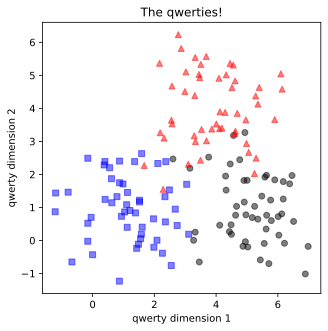

In [28]:
# Check that the function works

theData = createSomeData(50)

data = theData['data']
labels = theData['labels']

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()